<a href="https://colab.research.google.com/github/charlessantarosa/dl-experimental-keras/blob/charles.santarosa/mlp_keras_simple_charles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
# Redes Neurais
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline
# Avaliação.
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

# Configuration

In [2]:
DATA_TRAIN = 'https://github.com/charlessantarosa/dl-experimental-keras/blob/master/train.csv?raw=true'
DATA_TEST = 'https://github.com/charlessantarosa/dl-experimental-keras/blob/master/test.csv?raw=true'

In [3]:
# Lendo o dataset Kaggle
train = pd.read_csv(DATA_TRAIN)

#Alternativa ler do próprio keras
#(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
# Analisando o dataset
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 42000
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [5]:
# Separando x_train e y_train
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())
# Em formato numpy array de imagens 28 x 28
#x = X.values.reshape(-1,28,28,1)
#print(x[0])

   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]


In [6]:
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


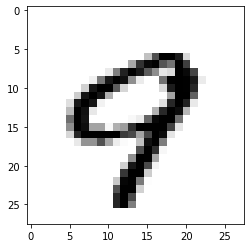

Label: 9


In [7]:
# Numtendi nada!
# Bora ver com matplotlib
plt.imshow(X.values[100].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[100]))

In [ ]:
# Transformando a imagem 2d em um numpy array (imagem 28*28 = 784 pixels)
x = X.values.reshape(42000, 784)

#Normalizando para valores entre 0 e 1
x = x.astype('float32')
x /= 255

print(x[0])

In [9]:
# Separando uma parte para treino (90%) e outra para validação (10%)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, Y, test_size = 0.1, random_state=9)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

NameError: ignored

In [ ]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential()
# Camada com 30 neurônios
model.add(Dense(30, activation='relu', input_shape=(784,)))
# Dropout de 20%
model.add(Dropout(0.2))
# Camada de 20 neurônios
model.add(Dense(20, activation='relu'))
# Dropout de 20%
model.add(Dropout(0.2))
# Camda de classificação final, com 1 neurônio para cada classe de saída. Softmax divide a probabilidade de cada classe.
model.add(Dense(num_classes, activation='softmax'))

model.summary()

In [ ]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
# Treina com os parte dos dados
batch_size = 32
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

In [ ]:
#Vamos ver como foi o treino?

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Testa
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
Y[10]

In [ ]:
# Testando uma entrada qualquer
print(y_train[10])
print(model.predict(x_train[10].reshape((1,784))))
print(model.predict_classes(x_train[10].reshape((1,784))))

In [ ]:
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Vendo alguns reports
# Usando sklearn
import numpy as np

# Classificando toda base de teste
y_pred = model.predict_classes(x_val)
# voltando pro formato de classes
y_test_c = np.argmax(y_val, axis=1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Confution Matrix
cm = confusion_matrix(y_test_c, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, y_pred, target_names=target_names))

In [ ]:
# Gerando saída para dataset de teste

#Carrega dataset de teste
test = pd.read_csv("../input/digit-recognizer/test.csv")
print("Qtde de testes: {}".format(len(test)))
# Bota no formato numpy e normaliza
x_test = test.values.reshape(len(test),784)
x_test = x_test.astype('float32')
x_test /= 255

# Faz classificação para dataset de teste
y_pred = model.predict_classes(x_test)

# Verficando algum exemplo
i = 0
plt.imshow(test.values[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Previsto: {}'.format(y_pred[i]))

# Botando no formato de saída (competição Kaggle)
results = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,len(y_pred)+1),name = "ImageId"),results],axis = 1)
print(submission.head(10))
#Salvando Arquivo
submission.to_csv("mlp_mnist_v1.csv",index=False)

In [ ]:
#introduzindo ruido
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (4200, 784))
x_te = x_val + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(4200, 28,28)[0], cmap=plt.cm.binary)
plt.show()

# Testa
score = model.evaluate(x_te, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])